# Evaluation Measures # 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels

## Classification Measures ##


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title="Confusion Matrix",
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
# import some data to play with
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


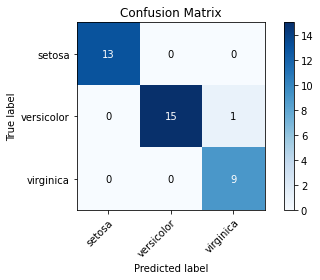

In [ ]:

X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,shuffle=True)

classifier =  LogisticRegression(random_state=6,max_iter=1000)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names)

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
# Accuracy
print("Accuracy:" + str(accuracy_score(y_test,y_pred)))
# F1 Score
print("F1-Score:" + str(f1_score(y_test,y_pred,average='macro')))
# Precision 
print("Precision:" + str(precision_score(y_test,y_pred,average='macro')))
# Recall 
print("Recall:" + str(recall_score(y_test,y_pred,average='macro')))

# Use average parameter on multi-class problems - the way it averages over classes.

# Log loss - It only works with classifiers that support predict_proba
print("Log Loss:" + str(log_loss(y_test,classifier.predict_proba(X_test))))


Accuracy:0.9736842105263158
F1-Score:0.9717034521788342
Precision:0.9666666666666667
Recall:0.9791666666666666
Log Loss:0.17161639050637115


You can find all the metrics available in scikit-learn in the page [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

## Regression ##

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
import math

In [ ]:
# import some data to play with
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)
X = diabetes.data
y = diabetes.target


# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,shuffle=True)

classifier =  LinearRegression()
y_pred = classifier.fit(X_train, y_train).predict(X_test)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# MAE
print("MAE:" + str(mean_absolute_error(y_test,y_pred)))
# Root Mean Sqaured Error
print("Root Mean Squared Error:" + str(mean_squared_error(y_test,y_pred) ** (1/2)))
# R2 Score
print("R2_Score:" + str(r2_score(y_test,y_pred)))


MAE:45.120987683251016
Root Mean Squared Error:56.393251695949644
R2_Score:0.35940090989715534


You can find all the available regression measures in the page [here](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

# Evaluation Process #

In [ ]:
#Imports

import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.utils  import resample
from sklearn.tree import DecisionTreeRegressor
import math

## Train, Validation and Test Set ## 

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer_dataset = load_breast_cancer()
print(cancer_dataset.DESCR[:1200])
X = cancer_dataset.data
y = cancer_dataset.target
model = LogisticRegression(random_state = 6, max_iter=1000)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# Alternatively we can split the initial dataset as 60% - 20% - 20%

In [ ]:
# Let's tune the regularization of the model using the f1_score score

predictions = [ ]

for reg in range(1,10):
  reg = reg/10
  model = LogisticRegression(C=reg, random_state = 6, max_iter = 10000)
  model.fit(X_train,y_train)
  pred = model.predict(X_val)
  predictions.append([reg,f1_score(y_val,pred)])
  
print(predictions)

[[0.1, 0.9743589743589743], [0.2, 0.9743589743589743], [0.3, 0.9743589743589743], [0.4, 0.9743589743589743], [0.5, 0.9743589743589743], [0.6, 0.9743589743589743], [0.7, 0.9743589743589743], [0.8, 0.9661016949152542], [0.9, 0.9661016949152542]]


In [ ]:
  #Use the model of the validation test on the test set
  
  model = LogisticRegression(C=0.2, random_state = 6, max_iter=10000)
  
  pred = model.fit(X_train,y_train).predict(X_test)
  print("Accuracy score on test set with just the training set:" + str(accuracy_score(y_test,pred)))
  
  
  
  pred = model.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val))).predict(X_test)
  print("Accuracy score on test set with the training set and the validation set:" + str(accuracy_score(y_test,pred)))


Accuracy score on test set with just the training set:0.8771929824561403
Accuracy score on test set with the training set and the validation set:0.8771929824561403


## Cross Validation ## 


In [ ]:
# Repeated Holdout

iterations =  10

model = LogisticRegression(max_iter=10000, random_state = 6)

accuracies = []
for i in range(0,iterations):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  pred = model.fit(X_train,y_train).predict(X_test)
  accuracies.append(accuracy_score(y_test,pred))
  
print(accuracies)
sm = sum(accuracies[0:len(accuracies)])
print("Average:" + str(sm/iterations))



[0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9122807017543859, 0.9649122807017544, 0.9385964912280702, 0.9473684210526315, 0.9649122807017544, 0.9385964912280702]
Average:0.9429824561403508


In [ ]:
# K fold cross validation
from sklearn.model_selection import KFold

iterations =  20

model = LogisticRegression(max_iter = 10000, random_state = 6)

kf = KFold(n_splits=iterations)


accuracies = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  pred = model.fit(X_train,y_train).predict(X_test)
  accuracies.append(accuracy_score(y_test,pred))
  
print(accuracies)
sm = sum(accuracies[0:len(accuracies)])
print("Average:" + str(sm/iterations))


[0.9310344827586207, 0.8275862068965517, 0.9310344827586207, 0.9655172413793104, 0.9655172413793104, 0.9310344827586207, 1.0, 0.9655172413793104, 0.9310344827586207, 0.9642857142857143, 0.9285714285714286, 1.0, 1.0, 0.9642857142857143, 0.9285714285714286, 0.9642857142857143, 0.9285714285714286, 0.9642857142857143, 0.9642857142857143, 0.9285714285714286]
Average:0.9491995073891625


## Stratified k-fold ## 

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)
model = LogisticRegression(max_iter=10000, random_state = 6)

accuracies = []

for train_index, test_index in skf.split(X,y): 
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  print("train:")
  print(np.unique(y_train,return_counts=True))
  print("test:")
  print(np.unique(y_test,return_counts=True))

  pred = model.fit(X_train,y_train).predict(X_test)
  accuracies.append(accuracy_score(y_test,pred))
  
print(accuracies)
sm = sum(accuracies[0:len(accuracies)])
print("Average:" + str(sm/iterations))

train:
(array([0, 1]), array([190, 322]))
test:
(array([0, 1]), array([22, 35]))
train:
(array([0, 1]), array([190, 322]))
test:
(array([0, 1]), array([22, 35]))
train:
(array([0, 1]), array([191, 321]))
test:
(array([0, 1]), array([21, 36]))
train:
(array([0, 1]), array([191, 321]))
test:
(array([0, 1]), array([21, 36]))
train:
(array([0, 1]), array([191, 321]))
test:
(array([0, 1]), array([21, 36]))
train:
(array([0, 1]), array([191, 321]))
test:
(array([0, 1]), array([21, 36]))
train:
(array([0, 1]), array([191, 321]))
test:
(array([0, 1]), array([21, 36]))
train:
(array([0, 1]), array([191, 321]))
test:
(array([0, 1]), array([21, 36]))
train:
(array([0, 1]), array([191, 321]))
test:
(array([0, 1]), array([21, 36]))
train:
(array([0, 1]), array([191, 322]))
test:
(array([0, 1]), array([21, 35]))
[0.9824561403508771, 0.9122807017543859, 0.9298245614035088, 0.9473684210526315, 0.9824561403508771, 0.9824561403508771, 0.9298245614035088, 0.9473684210526315, 0.9649122807017544, 0.9642857

## Limited Data ##

Leave-one-out cross-validation [(LOO)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)

For bagging you can use the resample function with replacement (default) and combine the score manually. 

## Learning Curves ##

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits,load_iris,load_wine,load_breast_cancer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

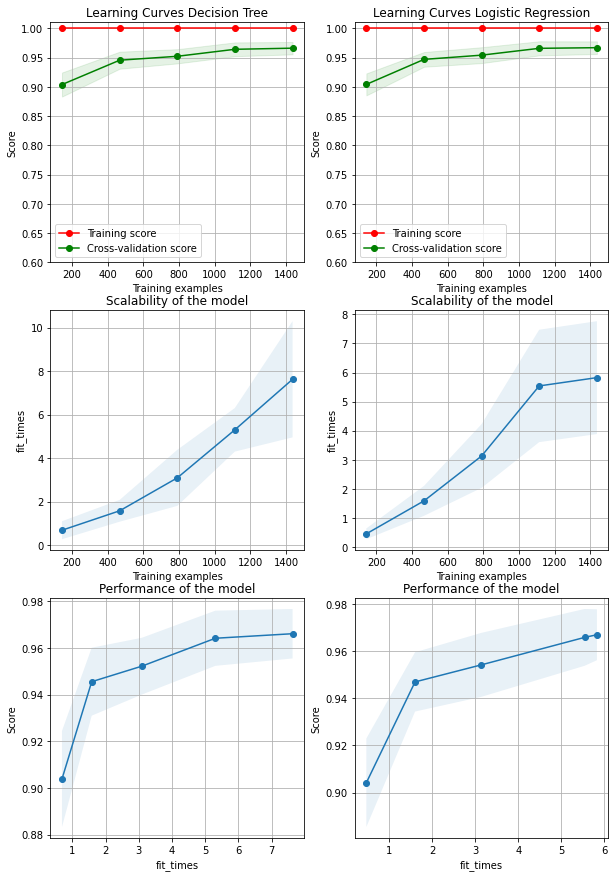

In [ ]:

fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves Decision Tree"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = LogisticRegression(random_state=42,max_iter=10000)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=-1)

title = r"Learning Curves Logistic Regression"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = LogisticRegression(C=0.3,max_iter=10000,random_state=42)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=-1)

plt.show()